<a href="https://colab.research.google.com/github/MartinPdeS/PyMieSim/blob/master/PyMieSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build latest package version
============================


In [1]:
# !mkdir Project
# !rm -rf Project/PyMieSim
# !cd Project && git clone https://github.com/MartinPdeS/PyMieSim.git
# !cd Project/PyMieSim && git submodule init && git submodule update
# !python -m pip uninstall PyMieSim -y && cd Project/PyMieSim && cmake . && sudo make install && python -m pip install .

!python -m pip install PyMieSim --no-cache-dir --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 138.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 155.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 166.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 204.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 124.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following

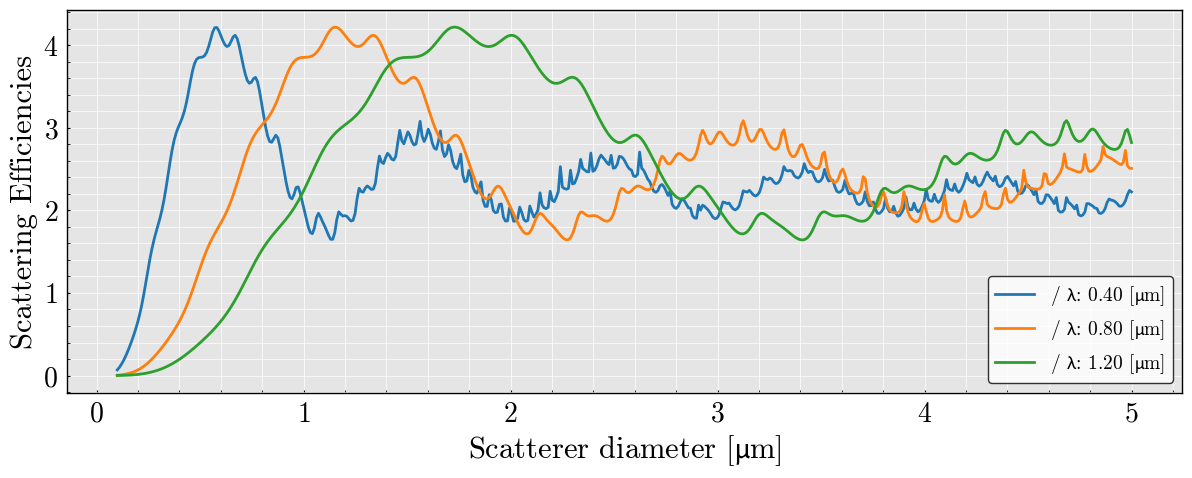

In [4]:
import numpy as np
from PyMieSim.experiment import Sphere, Gaussian, Photodiode, Setup
from PyMieSim import measure


source_set = Gaussian(
    wavelength=[400e-9, 800e-9, 1200e-9],
    polarization_value=0,
    polarization_type='linear',
    NA=0.3,
    optical_power=1e-3
)

scatterer_set = Sphere(
    diameter=np.linspace(100e-9, 5000e-9, 500),
    index=1.44,
    medium_index=1,
    source_set=source_set
)



setup = Setup(
    source_set=source_set,
    scatterer_set=scatterer_set,
    detector_set=None
)

DataSet = setup.get(measure.Qsca)

# scatterer_set.diameter.scale_unit('micro')

figure = DataSet.plot(
    x=setup.diameter,
)



_ = figure.show()

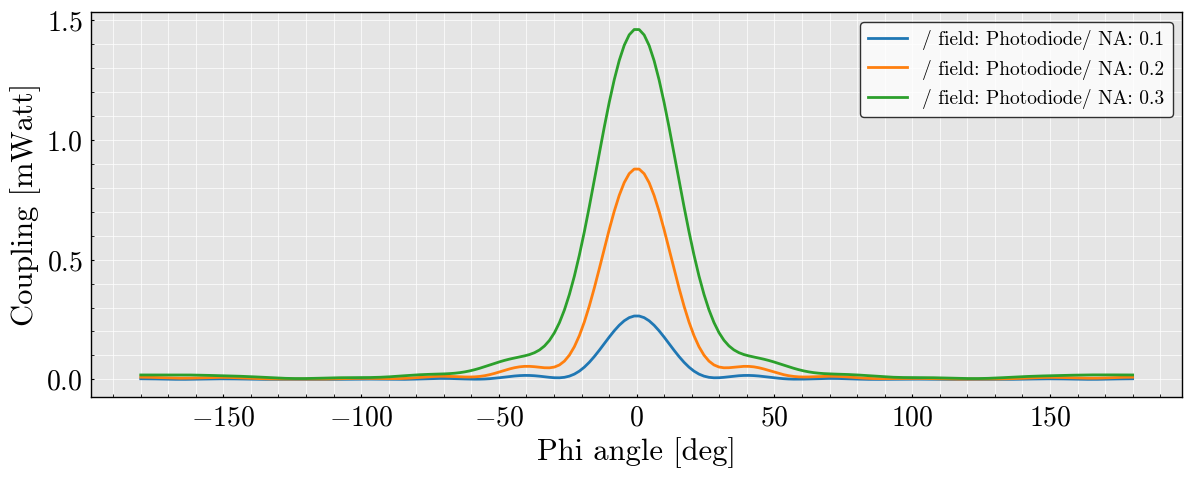

In [5]:
source_set = Gaussian(
    wavelength=400e-9,
    polarization_value=0,
    polarization_type='linear',
    optical_power=1e-3,
    NA=0.3
)

scatterer_set = Sphere(
    diameter=800e-9,
    index=1.44,
    medium_index=1,
    source_set=source_set
)

detector_set = Photodiode(
    NA=[0.1, 0.2, 0.3],
    phi_offset=np.linspace(-180, 180, 200),
    gamma_offset=0,
    sampling=300,
    polarization_filter=None
)

setup = Setup(
    source_set=source_set,
    scatterer_set=scatterer_set,
    detector_set=detector_set
)

data_set = setup.get(measure.coupling)

figure = data_set.plot(
    x=setup.phi_offset,
)


_ = figure.show()